In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from tensorflow.keras.applications import resnet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')

In [2]:
# Setting paths and showing the number of images
falciparum = os.listdir("final_dataset1/Falciparum")
falciparum_path = "final_dataset1/Falciparum"
print("Length of falciparum data = ", len(falciparum), 'images')
vivax = os.listdir("final_dataset1/Vivax")
vivax_path = "final_dataset1/Vivax"
print("Length of vivax data = ", len(vivax), 'images')
uninfected = os.listdir("final_dataset1/Uninfected")
uninfected_path = "final_dataset1/Uninfected"
print("Length of uninfected data = ", len(uninfected), 'images')

Length of falciparum data =  965 images
Length of vivax data =  965 images
Length of uninfected data =  965 images


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_shape=(224,224,3)
# Define ImageDataGenerator for both training and validation sets
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Generate data flow from directory, split into training and validation sets
train_generator = image_gen.flow_from_directory(
    directory='final_dataset1',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Specify training subset
    shuffle=True
)

validation_generator = image_gen.flow_from_directory(
    directory='final_dataset1',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Specify validation subset
    shuffle=False
)

Found 2316 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [2]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Instantiating the Xception model
xception = Xception(input_shape=[224, 224, 3],
                    weights='imagenet',  # Include the pre-trained weights
                    include_top=False)  # To use our own input and get the desired output

# Do not train the existing weights
for layer in xception.layers:
    layer.trainable = False

# Defining input and output to the model
x = Flatten()(xception.output)
# Change the number of neurons in the output layer to 3 for 3 classes and use 'softmax' activation
prediction = Dense(3, activation='softmax')(x)

# Creating a model
model = Model(inputs=xception.input, outputs=prediction)

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [5]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
73/73 [==============================] - 499s 7s/step - loss: 0.6974 - accuracy: 0.8813 - val_loss: 2.1129 - val_accuracy: 0.7686
Epoch 2/10
73/73 [==============================] - 522s 7s/step - loss: 0.3284 - accuracy: 0.9361 - val_loss: 1.5806 - val_accuracy: 0.8204
Epoch 3/10
73/73 [==============================] - 496s 7s/step - loss: 0.3327 - accuracy: 0.9374 - val_loss: 2.0683 - val_accuracy: 0.8117
Epoch 4/10
73/73 [==============================] - 483s 7s/step - loss: 0.3260 - accuracy: 0.9396 - val_loss: 1.5344 - val_accuracy: 0.8394
Epoch 5/10
73/73 [==============================] - 479s 7s/step - loss: 0.3037 - accuracy: 0.9585 - val_loss: 1.8431 - val_accuracy: 0.8256
Epoch 6/10
73/73 [==============================] - 507s 7s/step - loss: 0.1810 - accuracy: 0.9706 - val_loss: 1.3783 - val_accuracy: 0.8549
Epoch 7/10
73/73 [==============================] - 484s 7s/step - loss: 0.2751 - accuracy: 0.9529 - val_loss: 2.6430 - val_accuracy: 0.7979
Epoch 8/10
73

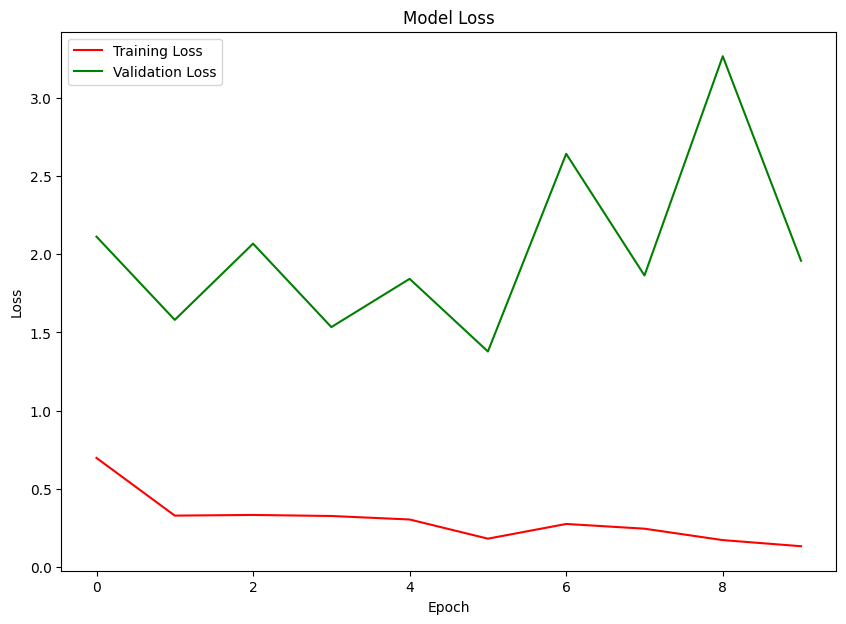

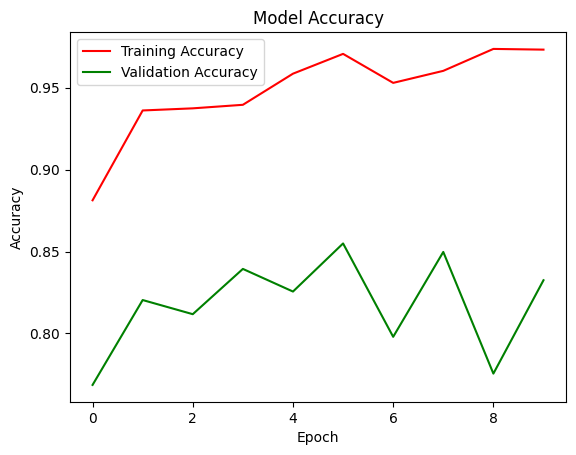

In [6]:
# Create a new figure and axes object
fig, ax = plt.subplots(figsize=(10, 7))

# Check if 'loss' and 'val_loss' are in history.history
if 'loss' in history.history:
    ax.plot(history.history['loss'], color='red', label='Training Loss')
if 'val_loss' in history.history:
    ax.plot(history.history['val_loss'], color='green', label='Validation Loss')

# Add labels and legend
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()

if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')

# Add labels and legend
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



# WITH PRE-PROCESSING

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_shape=(224,224,3)
# Define ImageDataGenerator for both training and validation sets
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Generate data flow from directory, split into training and validation sets
train_generator = image_gen.flow_from_directory(
    directory='preprocessed_dataset',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Specify training subset
    shuffle=True
)

validation_generator = image_gen.flow_from_directory(
    directory='preprocessed_dataset',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Specify validation subset
    shuffle=False
)

Found 2316 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [4]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
73/73 [==============================] - 290s 4s/step - loss: 0.2592 - accuracy: 0.9607 - val_loss: 0.0382 - val_accuracy: 0.9931
Epoch 2/10
73/73 [==============================] - 239s 3s/step - loss: 0.0471 - accuracy: 0.9909 - val_loss: 0.1396 - val_accuracy: 0.9914
Epoch 3/10
73/73 [==============================] - 235s 3s/step - loss: 0.0252 - accuracy: 0.9957 - val_loss: 0.0528 - val_accuracy: 0.9914
Epoch 4/10
73/73 [==============================] - 459s 6s/step - loss: 0.0651 - accuracy: 0.9914 - val_loss: 0.0416 - val_accuracy: 0.9965
Epoch 5/10
73/73 [==============================] - 499s 7s/step - loss: 0.0426 - accuracy: 0.9922 - val_loss: 0.2876 - val_accuracy: 0.9775
Epoch 6/10
73/73 [==============================] - 496s 7s/step - loss: 0.0650 - accuracy: 0.9914 - val_loss: 0.0497 - val_accuracy: 0.9931
Epoch 7/10
73/73 [==============================] - 322s 4s/step - loss: 0.0193 - accuracy: 0.9961 - val_loss: 0.1454 - val_accuracy: 0.9827
Epoch 8/10
73

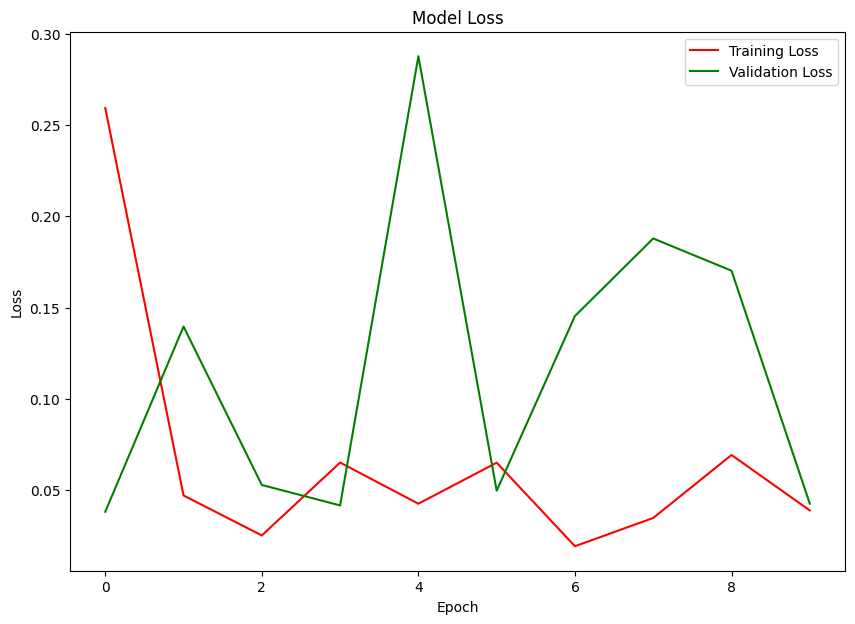

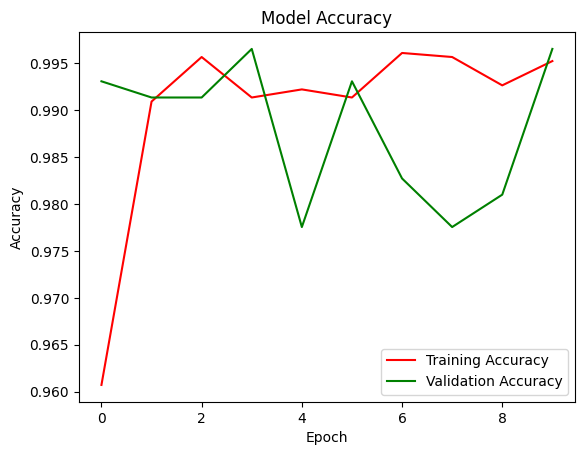

In [5]:
# Create a new figure and axes object
fig, ax = plt.subplots(figsize=(10, 7))

# Check if 'loss' and 'val_loss' are in history.history
if 'loss' in history.history:
    ax.plot(history.history['loss'], color='red', label='Training Loss')
if 'val_loss' in history.history:
    ax.plot(history.history['val_loss'], color='green', label='Validation Loss')

# Add labels and legend
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()

if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')

# Add labels and legend
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

